In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [19]:
stock = "MSFT"

In [20]:
raw_data = yf.download([stock],start="2020-01-01", end = "2024-12-31")
data = raw_data['Adj Close']

data

[*********************100%%**********************]  1 of 1 completed


Date
2020-01-02    154.493835
2020-01-03    152.570129
2020-01-06    152.964462
2020-01-07    151.569763
2020-01-08    153.984039
                 ...    
2024-05-07    409.339996
2024-05-08    410.540009
2024-05-09    412.320007
2024-05-10    414.739990
2024-05-13    413.720001
Name: Adj Close, Length: 1098, dtype: float64

In [21]:
returns = data.pct_change()
last_price = data.iloc[-1]
print(f"{stock} Current Price : {last_price}")

MSFT Current Price : 413.7200012207031


<Axes: >

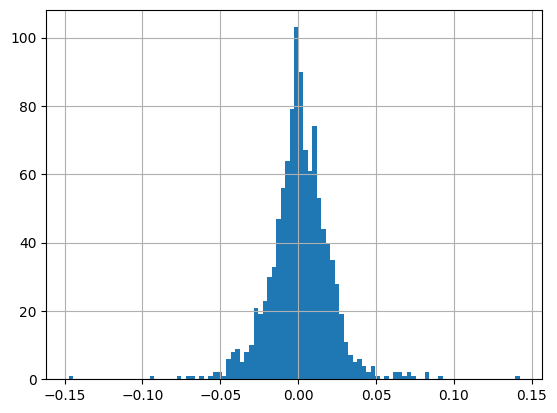

In [22]:
returns.hist(bins=100)

In [23]:
daily_volatility = returns.std()
rtn = np.random.normal(0,daily_volatility)
rtn

-0.012757188141262428

In [24]:
price = last_price * (1 + rtn)
price

408.44209732732725

In [25]:
num_simulations = 1000
num_days = 200

simulations_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    price_series = []
    rtn = np.random.normal(0,daily_volatility)
    price = last_price + (1+ rtn)
    price_series.append(price)
    for d in range(num_days):
        rtn = np.random.normal(0,daily_volatility)
        price = price_series[d] * (1+rtn)
        price_series.append(price)
    simulations_df[x] = price_series

simulations_df



,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,414.730234,414.729254,414.757445,414.718130,414.723717,414.724191,414.701951,414.731387,414.753208,414.705221,...,414.707000,414.747649,414.718853,414.743084,414.711129,414.689918,414.758645,414.724642,414.744848,414.725091
1,416.176677,407.097325,421.246167,410.638420,421.650306,418.366616,414.743085,412.951104,417.303878,409.748963,...,422.668367,419.041470,421.580226,419.592060,413.772680,411.403454,405.422277,412.145458,405.421697,406.876329
2,433.507263,382.589927,434.714501,410.782731,411.272228,413.477871,429.997433,414.129167,427.271403,404.249068,...,408.691111,427.702109,437.218189,418.919420,436.651855,405.050824,406.373686,410.279649,416.895066,414.954039
3,430.155533,365.507637,433.737285,394.614089,403.457730,413.651371,424.599604,403.415640,432.386855,401.017544,...,398.573301,431.766499,447.620156,412.803596,446.495447,406.523524,398.559496,405.448811,417.714828,408.725314
4,428.648370,360.114548,420.040792,394.286126,408.091805,413.635297,416.583891,393.573658,431.137679,388.736636,...,392.320788,430.411037,434.738731,419.072477,441.276399,401.248103,388.608871,406.950753,423.669414,419.539585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,387.319735,242.887079,540.497117,376.932165,262.556952,594.378542,433.196399,292.599312,469.938087,430.367218,...,306.456224,403.582350,273.555233,420.283406,553.635576,417.818332,367.393213,633.144095,414.618252,555.095513
197,394.150154,247.362962,519.842672,380.145158,269.445587,586.096762,430.848834,295.079754,472.726706,435.607159,...,314.425102,398.617057,275.636989,420.316242,555.388104,427.055583,365.489731,630.894208,412.179649,556.064713
198,387.429169,246.449762,533.330179,382.390196,267.634234,581.659604,421.279723,286.556221,466.589526,436.438147,...,313.970988,381.250737,276.705644,426.683819,563.695864,437.182625,372.929596,623.435429,403.297304,577.480998
199,390.085886,245.043936,511.664455,386.883752,268.465364,584.665711,422.620025,279.865030,462.415866,438.814616,...,308.135762,378.924035,279.477440,425.371504,570.581012,431.055158,374.447025,643.533529,406.821662,589.130552


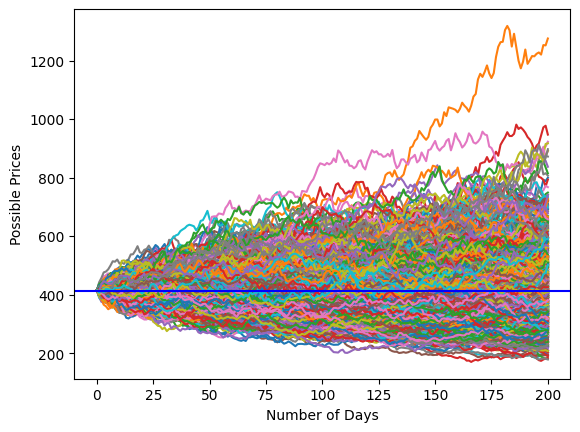

In [26]:
fig = plt.figure()
plt.plot(simulations_df)
plt.xlabel('Number of Days')
plt.ylabel('Possible Prices')

plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.show()


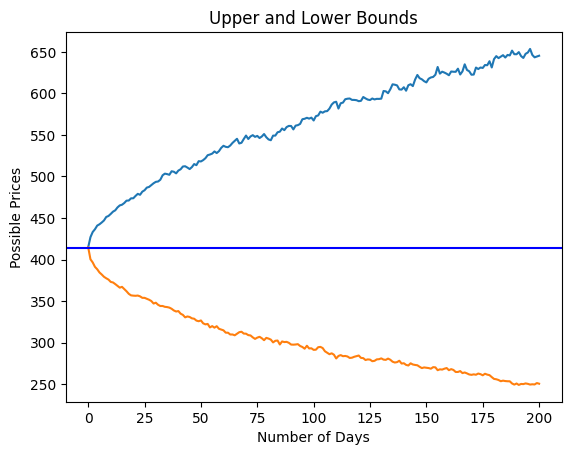

In [27]:
upper_bound = simulations_df.quantile(.95, axis=1)
lower_bound = simulations_df.quantile(.05, axis=1)

stock_range = pd.concat([upper_bound, lower_bound], axis=1)


fig = plt.figure()
plt.plot(stock_range)
plt.xlabel('Number of Days')
plt.ylabel('Possible Prices')
plt.title("Upper and Lower Bounds")

plt.axhline(y = last_price, color = 'b', linestyle = '-')

plt.show()
                                      

In [28]:
from scipy.stats import t

In [29]:
num_samples = 100

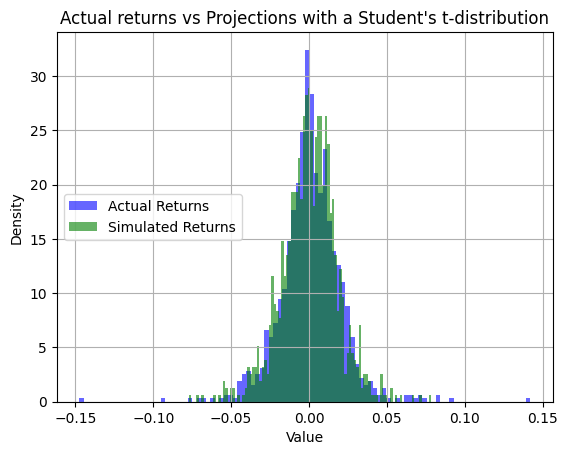

In [30]:
ret = returns[1::]
params = t.fit(ret)

t_results = t.rvs(df = params[0], loc = params[1], scale = params[2], size = 1000)


returns.hist(bins = 100, density = True, alpha = 0.6, color = 'b', label = 'Actual Returns')

plt.hist(t_results, bins = 100, density = True, alpha = 0.6, color = 'g', label = 'Simulated Returns')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Actual returns vs Projections with a Student\'s t-distribution')
plt.legend(loc = 'center left')
plt.grid(True)
plt.show()

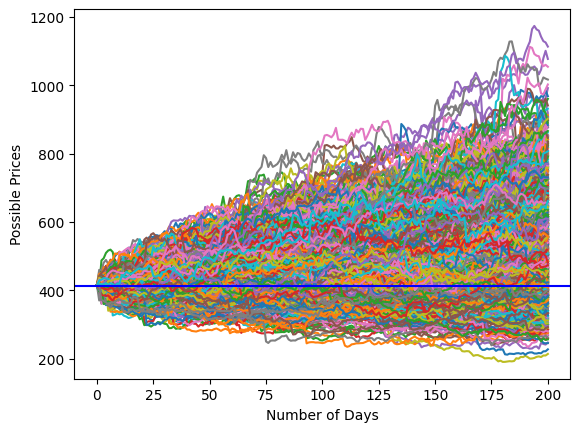

In [31]:
num_simulations = 1000
num_days = 200

simulations_t_df = pd.DataFrame()

for x in range(num_simulations):
    count = 0
    price_series = []
    rtn = t.rvs(df = params[0], loc = params[1], scale = params[2], size=1)[0]
    price = last_price + (1+ rtn)
    price_series.append(price)
    for d in range(num_days):
        rtn = t.rvs(df = params[0], loc = params[1], scale = params[2], size=1)[0]
        price = price_series[d] * (1+rtn)
        price_series.append(price)
    simulations_t_df[x] = price_series

fig = plt.figure()
plt.plot(simulations_t_df)
plt.xlabel('Number of Days')
plt.ylabel('Possible Prices')

plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.show()


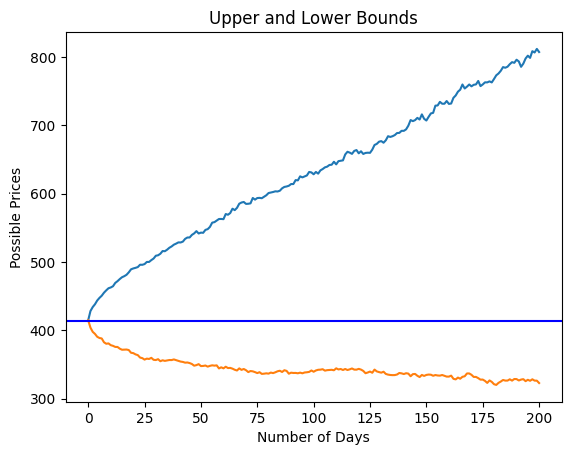

In [32]:
upper_bound = simulations_t_df.quantile(.95, axis=1)
lower_bound = simulations_t_df.quantile(.05, axis=1)

stock_range = pd.concat([upper_bound, lower_bound], axis=1)


fig = plt.figure()
plt.plot(stock_range)
plt.xlabel('Number of Days')
plt.ylabel('Possible Prices')
plt.title("Upper and Lower Bounds")

plt.axhline(y = last_price, color = 'b', linestyle = '-')

plt.show()